#Лабораторна робота №9

Завдання №1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

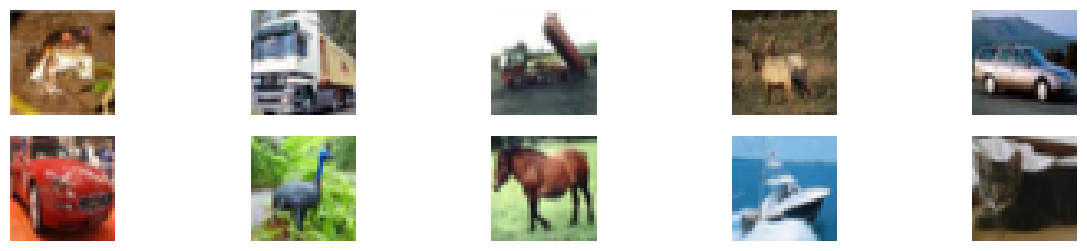

In [ ]:
# Завантажити датасет CIFAR-10 та вивести перші 10 зображень
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Виведення перших 10 зображень
def plot_images(images, labels, num=10):
    plt.figure(figsize=(15, 3))
    for i in range(num):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

plot_images(x_train, y_train)

In [ ]:
# Підготувати дані
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
# Підібрати архітектуру моделі
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Оптимізатор та параметри
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Використання кол-беків
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

In [ ]:
# Підготовка до навчання
batch_size = 64
epochs = 20

# Навчання моделі
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4698 - loss: 1.4627 - val_accuracy: 0.5353 - val_loss: 1.2952 - learning_rate: 0.0010
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5864 - loss: 1.1643 - val_accuracy: 0.6141 - val_loss: 1.0905 - learning_rate: 0.0010
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6348 - loss: 1.0391 - val_accuracy: 0.6466 - val_loss: 1.0113 - learning_rate: 0.0010
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6775 - loss: 0.9242 - val_accuracy: 0.6717 - val_loss: 0.9268 - learning_rate: 0.0010
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7002 - loss: 0.8536 - val_accuracy: 0.6899 - val_loss: 0.8875 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7196 - loss: 0.8054 - val_accuracy: 0.6902 - val_loss: 0.8998 - learning_rate: 0.0010
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7395 - loss: 0.7484 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

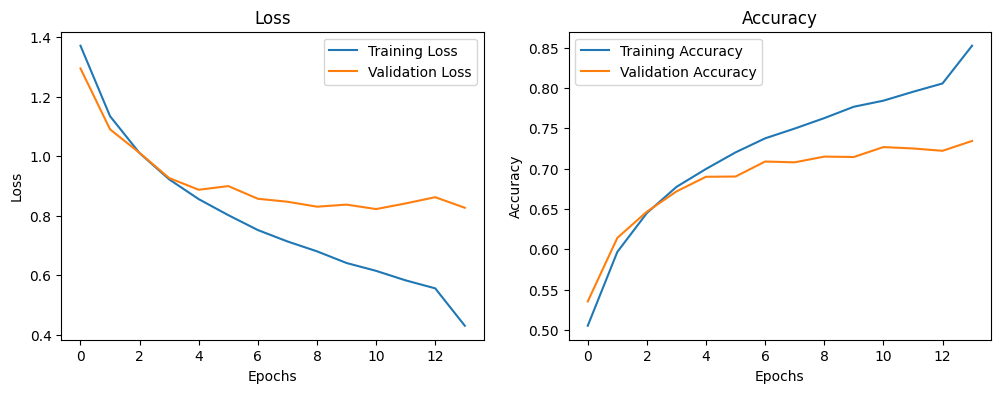

In [ ]:
# Вивести summary моделі
model.summary()

# Побудова графіків функції втрат і точності
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_training_history(history)

In [ ]:
# Класифікаційний звіт
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
              precision    recall  f1-score   support

           0       0.09      0.15      0.11      1000
           1       0.00      0.00      0.00      1000
           2       0.09      0.03      0.05      1000
           3       0.15      0.04      0.06      1000
           4       0.11      0.00      0.00      1000
           5       0.09      0.10      0.10      1000
           6       0.15      0.12      0.13      1000
           7       0.07      0.00      0.01      1000
           8       0.13      0.73      0.21      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.12     10000
   macro avg       0.09      0.12      0.07     10000
weighted avg       0.09      0.12      0.07     10000



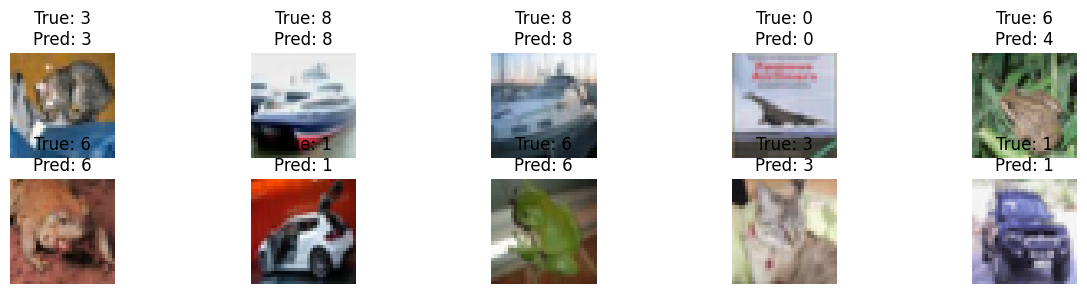

In [ ]:
# Візуалізація деяких зображень з їх передбаченнями
def visualize_predictions(images, true_labels, pred_labels, num=10):
    plt.figure(figsize=(15, 3))
    for i in range(num):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {true_labels[i]}\nPred: {pred_labels[i]}')
        plt.axis('off')
    plt.show()

visualize_predictions(x_test, y_true, y_pred_classes)

Висновок: Модель розроблена для класифікації зображень з датасету CIFAR-10, демонструє задовільні результати. Загальна кількість параметрів: 367,712, Кількість навчальних параметрів: 122,570, Параметри оптимізатора: 245,142. Графік втрат показав, що тренувальні втрати (Training Loss) зменшилися від 1.4 до приблизно 0.5 за час навчання.Точність на тренувальному наборі даних зросла до 80%, тоді як точність на валідаційному наборі коливалася, досягаючи приблизно 70-75%. Класифікаційний звіт показав, що:
Precision для класу 0 становила 0.09, для класу 1 — 0.00, а для класу 8 — 0.13, що свідчить про непостійність у розпізнаванні різних класів.
Recall коливалася, з найвищими показниками для класу 8 (0.73), але для інших класів залишалася на низькому рівні, що вказує на проблеми з ідентифікацією деяких класів.
F1-score для більшості класів також був нижчим, ніж бажано, з найвищим значенням лише 0.21 для класу 8.
Модель показала добрі результати при класифікації зображень з датасету CIFAR-10

Завдання №2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Завантаження датасету CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Підготовка даних
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
# Завантаження попередньо навчених ваг VGG16 без верхнього шару
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Замороження деяких шарів
for layer in base_model.layers:
    layer.trainable = False

# Додавання нових шарів
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Використання кол-беків
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)


In [ ]:
# Параметри навчання
batch_size = 64
epochs = 20

# Навчання моделі
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.3961 - loss: 1.7239 - val_accuracy: 0.5462 - val_loss: 1.2938 - learning_rate: 0.0010
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.5397 - loss: 1.3236 - val_accuracy: 0.5694 - val_loss: 1.2309 - learning_rate: 0.0010
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5547 - loss: 1.2658 - val_accuracy: 0.5819 - val_loss: 1.1917 - learning_rate: 0.0010
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5742 - loss: 1.2155 - val_accuracy: 0.5798 - val_loss: 1.1891 - learning_rate: 0.0010
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5843 - loss: 1.1880 - val_accuracy: 0.5932 - val_loss: 1.1569 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.5947 - loss: 1.1606 - val_accuracy: 0.6012 - val_loss: 1.1394 - learning_rate: 0.0010
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5938 - loss

In [ ]:
# Вивести summary моделі
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,116,384 (57.66 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 267,798 (1.02 MB)

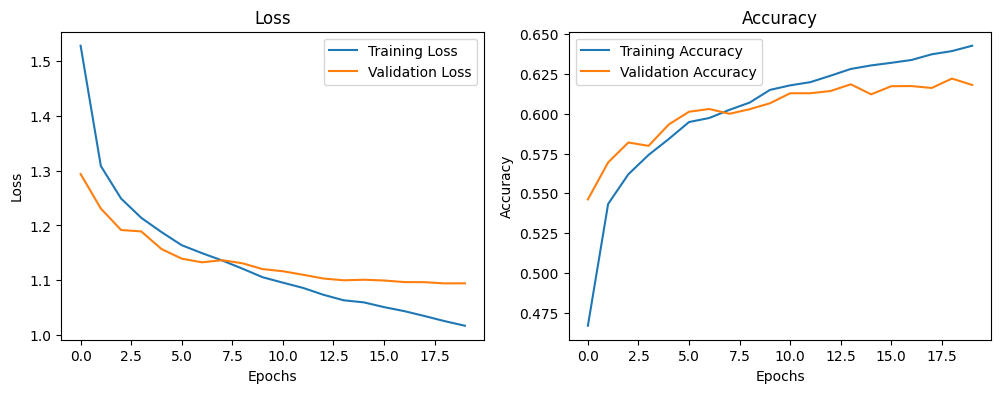

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_training_history(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1000
           1       0.64      0.72      0.68      1000
           2       0.59      0.48      0.53      1000
           3       0.45      0.43      0.44      1000
           4       0.56      0.58      0.57      1000
           5       0.59      0.49      0.53      1000
           6       0.63      0.70      0.67      1000
           7       0.66      0.71      0.68      1000
           8       0.78      0.70      0.74      1000
           9       0.63      0.66      0.65      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000



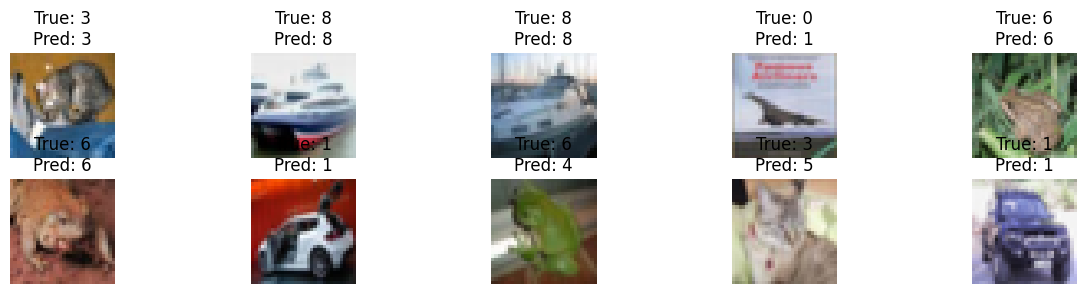

In [ ]:
# Отримання передбачень
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Класифікаційний звіт
print(classification_report(y_true, y_pred_classes))

# Візуалізація розпізнавання
def visualize_predictions(images, true_labels, pred_labels, num=10):
    plt.figure(figsize=(15, 3))
    for i in range(num):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {true_labels[i]}\nPred: {pred_labels[i]}')
        plt.axis('off')
    plt.show()

visualize_predictions(x_test, y_true, y_pred_classes)

Висновок: в даній частині графік показує зменшення втрат у навчанні та валідації. Хоча втрати валідації знижуються, графік втрат на тренувальному наборі є більш стабільним. Точність моделі зростає протягом навчання, але валідаційна точність коливається. Precision і recall для кожного класу є помірними, з найбільшими значеннями для класу 0  і найнижчими для класу 4. Це може свідчити про те, що деякі класи легші для класифікації, ніж інші.
https://github.com/maksim-poliovyi/machine-learning